# Arithmetic Operations

> This notebook is based on the medium post from [here](https://towardsdatascience.com/exploring-image-processing-techniques-opencv-4860006a243) and some samples from [opencv](https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html).

We will go through fundamental image processing techniques with OpenCV in this notebooks. 


Before starting, make sure you have done below:
- Install the dependencies via `pip install -r requirements.txt`. (Virtual environment is recommended)
- Prepare an interesting image for following experiments!

Let's go!

----

## Preparation

First import the necessary packages, and define the path to your testing images.

Note that image read via opencv is in BGR format, but matplotlib is expecting image in BGR. We will need a helper function to easily display the image in all the following codes.

In addition, `plt.imshow` requires extra parameter if the input image is in gray-scale. Refer to [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) for more information.

That's why we are importing a helper function `plt_show` here.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from utils.helper import plt_show

test_img = cv.imread("./tmp/test1.jpeg")
if test_img is None:
    print('Image was not read successfully')

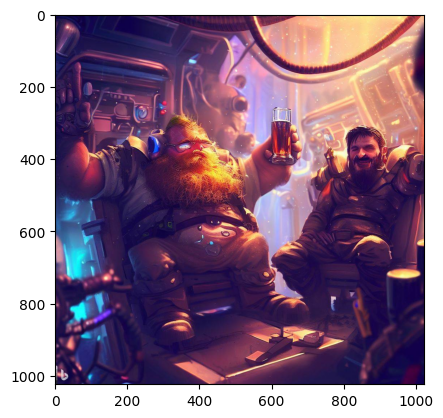

In [3]:
# Display the image
plt_show(test_img)

From OpenCV: Note that the default color format in OpenCV is often referred to as RGB **but it is actually BGR** (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red.

The conventional ranges for R, G, and B channel values are:

- 0 to 255 for CV_8U images
- 0 to 65535 for CV_16U images
- 0 to 1 for CV_32F images

In [4]:
print("Image dimension: ", test_img.shape)
print("Image type: ", test_img.dtype)

Image dimension:  (1024, 1024, 3)
Image type:  uint8


------
## Color space conversion

It is a common technique to convert RGB into Gray style via `cvtColor`. [Here](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#gga4e0972be5de079fed4e3a10e24ef5ef0a8199112edf021b1586c75ca20a46ecd1) is a full list of available conversion type.


(1024, 1024)


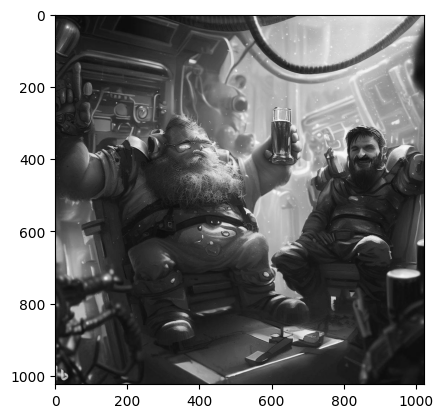

In [5]:

# Grayscale version of the input:
gray = cv.cvtColor(test_img, cv.COLOR_BGR2GRAY)
plt_show(gray, is_gray=True)
print(gray.shape)

We can even split the original BGR image into separated channels by `cv.split`:

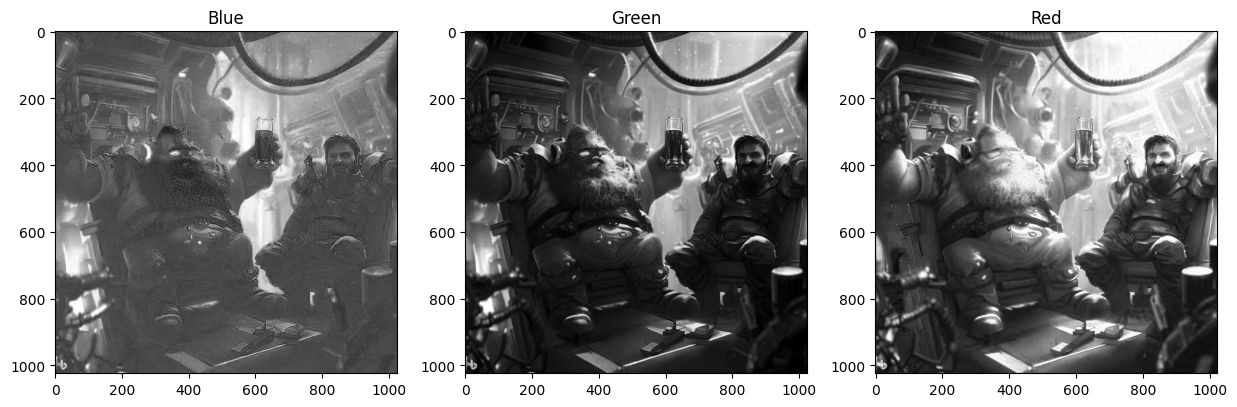

In [6]:
blue, green, red = cv.split(test_img)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].set_title("Blue")
plt_show(blue, axs_obj=axs[0])
axs[1].set_title("Green")
plt_show(green, axs_obj=axs[1])
axs[2].set_title("Red")
plt_show(red, axs_obj=axs[2])


Images above are not accurately being displayed by their color because each channel will be treated as a gray scale individually. We can convert them back to 3-d array and `mixChannels` comes in handy.

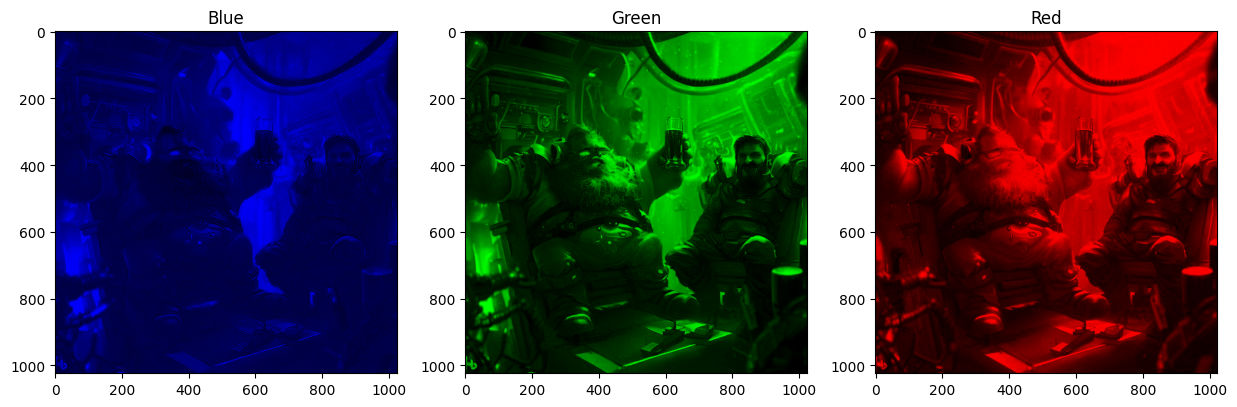

In [7]:
# We create a dummy 3D array
blue_channel = np.zeros(test_img.shape, test_img.dtype)
green_channel = np.zeros(test_img.shape, test_img.dtype)
red_channel = np.zeros(test_img.shape, test_img.dtype)

# We match each color channel to a 3D dimension:
    # Blue Rendering : [blue; 0; 0]
    # Green Rendering: [0; green; 0]
    # Red Rendering: [0; 0; red]
cv.mixChannels([blue, green, red], [blue_channel], [0,0])
cv.mixChannels([blue, green, red], [green_channel], [1,1])
cv.mixChannels([blue, green, red], [red_channel], [2,2])


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].set_title("Blue")
plt_show(blue_channel, axs_obj=axs[0])
axs[1].set_title("Green")
plt_show(green_channel, axs_obj=axs[1])
axs[2].set_title("Red")
plt_show(red_channel, axs_obj=axs[2])

------

## Contrast adjustment

To simplify the concept, you can think the formula inside convertScaleAbs is like:
- each_pixel * alpha + beta


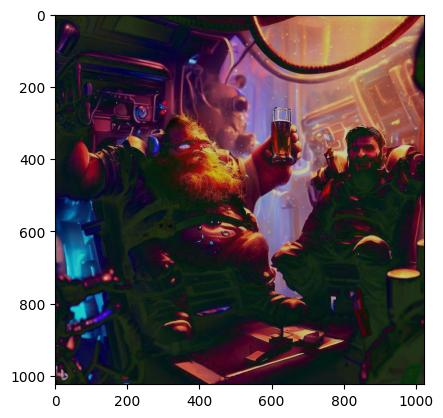

In [8]:

# New dummy image that will contain the adjustments
adjusted_image = np.zeros(test_img.shape, test_img.dtype)

# Defining alpha and beta:
alpha = 1.0   # Contrast Control [1.0-3.0]
beta = -50    # Brightness Control [0-100]

# Scaling and converting the image contrast and brightness
adjusted_image = cv.convertScaleAbs(test_img, alpha=alpha, beta=beta)
plt_show(adjusted_image)

-----------

## Image Addition

You can add two images with the OpenCV function, `cv.add()`, or simply by the numpy operation res = img1 + img2. However, their result could be different because `cv.add()` is a saturated operation(i.e. result is limited in the RGB range).

In [9]:
# a quick example
x = np.uint8([250])
y = np.uint8([10])

# 250+10 = 260 % 256 = 4
print("pure addition", x+y)
# 250+10 = 260 => 255
print("CV addition", cv.add(x, y))


pure addition [4]
CV addition [[255]]


Let's use cv.add() to add two image simply.

(<Axes: title={'center': 'Added images'}>,
 None,
 Text(0.5, 1.0, 'Added images'))

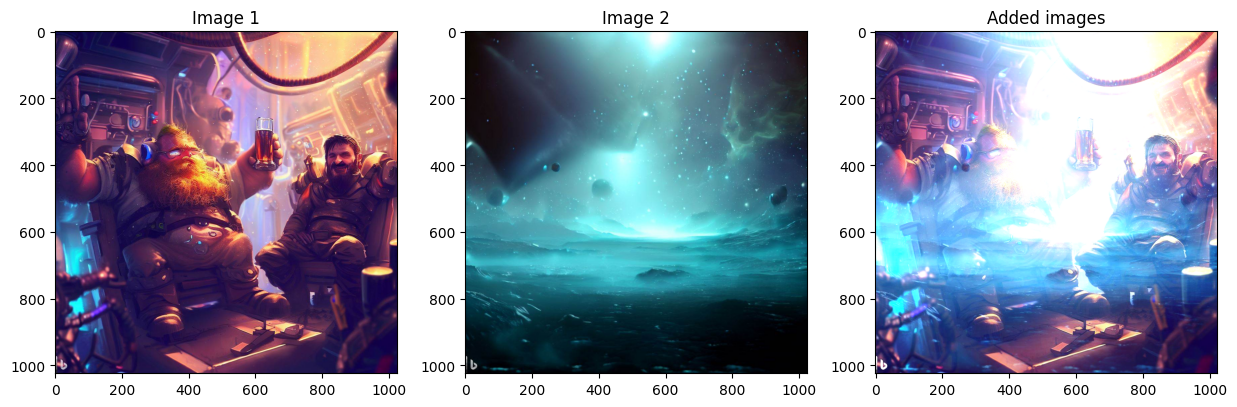

In [14]:
# Load another image for testing
test_img2 = cv.imread("./tmp/test2.jpeg")
pure_added_img = cv.add(test_img, test_img2)
plt.figure(figsize=(15,5))
plt.subplot(131), plt_show(test_img), plt.title("Image 1")
plt.subplot(132), plt_show(test_img2), plt.title("Image 2")
plt.subplot(133), plt_show(pure_added_img), plt.title("Added images")

<br><br>


### Image Blending

This is also image addition, but different weights are given to images in order to give a feeling of blending or transparency via `cv.addWeighted()`.

(<Axes: title={'center': 'Blended image'}>,
 None,
 Text(0.5, 1.0, 'Blended image'))

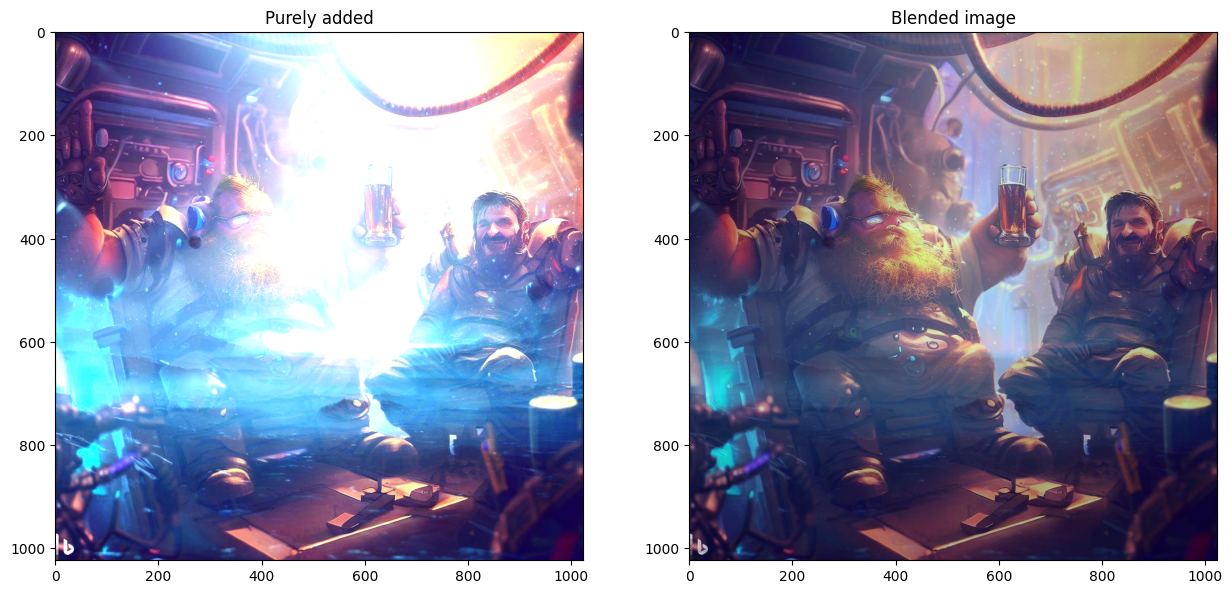

In [16]:
blended_img = cv.addWeighted(test_img, 0.7, test_img2, 0.3, 0)

plt.figure(figsize=(15,10))
plt.subplot(121), plt_show(pure_added_img), plt.title("Purely added")
plt.subplot(122), plt_show(blended_img), plt.title("Blended image")